# MAT245 Lab 9

## Classifcation using Logistic Regression

### Background

In a binary classification problem we have samples of data $x \in \mathbb{R}^n$, and we want to predict the value of a target variable $y \in \{0, 1\}$. For instance, a farmer might want to know if a $32 \times 32$ image $X \in \mathbb{R}^{32\times 32}$ contained a picture of a cucumber or not. We model absense or presense of a cucumber with outputs of $0$ or $1$ respectively.

The logistic regression approach to classification uses a hypothesis function $h_\theta$ of the form

$$
h_\theta(x) 
  = 
g(\theta^T x)
  =
\frac{1}{1 + e^{-\theta^T x}}.
$$

The parameter $\theta$ is what we're going to want to optimize. Since $h_\theta(x) \in [0, 1]$, we can interpret its value as the probability of $x$ having a certain label:

\begin{align*}
  \mathbb{P}(y = 1 ~|~ x, \theta) &= h_\theta(x) \\
  \mathbb{P}(y = 0 ~|~ x, \theta) &= 1 - h_\theta(x).
\end{align*}

So if $h_\theta(x) \geq 0.5$, we predict $y =1$, otherwise we predict $y = 0$. Written differently, this is

$$
 \mathbb{P}(y ~|~ x, \theta) = h_\theta(x)^y (1 - h_\theta(x))^{1-y}.
$$

Now, suppose we have $m$ independently generated samples in our dataset. As usual, we arrange these $m$ samples into an $m\times n$ matrix whose rows each represent individual samples. The likelihood of the parameter $\theta$ is given by

\begin{align*}
L(\theta)
  &=
\mathbb{P}(y ~|~ X, \theta) \\
  &= 
\prod_{i=1}^m \mathbb{P}(y^{(i)} ~|~ X^{(i)}, \theta) \\
  &=
\prod_{i=1}^m h_\theta(x^{(i)})^{y^{(i)}} (1 - h_\theta(x^{(i)}))^{1-y^{(i)}}.
\end{align*}

Our goal is then to choose $\theta$ to maximize this likelihood. In practice, it is easier to maximize the log-likelihood function:

\begin{align*}
  l(\theta) 
    &= 
  \log(L(\theta)) \\ 
    &= 
  \sum_{i=1}^m y^{(i)} \log [ h_\theta(x^{(i)})] + (1 - y^{(i)}) \log[1 - h_\theta(x^{(i)})].
\end{align*}

We can maximize the log-likelihood by performing stochastic gradient ascent. In other words, we choose a training pair $(x, y) = (x^{(i)}, y^{(i)})$ at random, and compute the gradient of $l$ at this pair using the formula:

\begin{align*}
\frac{\partial }{\partial\theta_j} l (\theta)
  &=
\left(y \frac{1}{g(\theta^T x} - (1 - y) \frac{1}{1 - g(\theta^T x)}\right) \frac{\partial}{\partial\theta_j}g(\theta^T x) \\
  &=
\left(y \frac{1}{g(\theta^T x} - (1 - y) \frac{1}{1 - g(\theta^T x)}\right) 
  g(\theta^T x)(1 - g(\theta^Tx)) \frac{\partial}{\partial\theta_j}\theta^Tx \\
  &=
(y(1 - g(\theta^Tx)) - (1 - y)g(\theta^Tx))x_j \\
  &=
(y - h_\theta(x))x_j.
\end{align*}

Above we used the derivative identity $g'(x) = g(z)(1-g(z))$. To choose new $\theta$ values, we want to take a small step in the direction of the gradient (since we are *maximizing* $l(\theta)$). This gives the update rule of

$$
\theta_j = \theta_j + \alpha (y^{(i)} - h_\theta(x^{(i)}))x_j^{(i)}
$$

where $\alpha$ is the learning rate parameter. 

### Application: breast cancer detection

The `sklearn` breast cancer dataset consists of $569$ $30$-dimensional data points. The goal is to classify each data point as representing either a *malignant* or *benign* tumor. You can load the data with the following code:

In [106]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def normalize(X):
    # the normalization of each features
    return (X - np.array(X.sum(axis=0)/float(X.shape[0])))/X.std(axis=0)

def add_bias(X):
    m = X.shape[0] # number of samples in the database
    return np.hstack((np.ones(m).reshape((-1,1)), X.reshape(m, -1))) 

def h(theta, X):
    # the hypothesis of x, without losing generalicity, X can be nparray
    # TODO: 
    return sigmoid(X.dot(theta))

def cost(theta, X ,y):
    # the cost function of the 
    m = X.shape[0]
    return np.sum((h(theta, X) - y)**2) / (2*float(m))

def gradient(theta, X, y):
    m = X.shape[0]
    # TODO: 
    return X.transpose().dot(h(theta, X)-y)/float(m)

def SGD(X, y, gradient_func, alpha, size, itrs):
    theta = np.zeros(X.shape[1])
    for i in range(itrs):
        rows = np.random.randint(X.shape[0], size=size)
        X_mini = X[rows,:]
        y_mini = y[rows]
        # print x passes
        theta = theta - gradient_func(theta, X_mini, y_mini)
        # print theta
    
    return theta

bc = datasets.load_breast_cancer()
samples, targets = bc.data, bc.target

# Normalize all the features
samples = normalize(samples)

# Add bias to all the features 
samples = add_bias(samples)

# to training set and validation set
X_train, X_test, y_train, y_test = train_test_split(samples, targets, test_size=0.33, random_state=42)

# use stochastic gradient descent
theta0 = np.ones(X_train.shape[1])


theta_trained = SGD(X_train, y_train, gradient, 0.05, 30, 1000)
print "Trained theta: "
print theta_trained

y_pred = h(theta_trained, X_test)
def decision(x):
    if x > 0.5:
        return int(1)
    else: 
        return int(0)
    
# very cool usage of index    
# y_pred[y_pred > 0.5] = 1.   
    
y_pred_int =  map (decision ,y_pred)
print ""
print "Predictions: "
print y_pred_int
    
# print h(theta0, X_train)
# print samples
# print targets
print ""
print "Accuracy in test set: "
print metrics.accuracy_score(y_test, y_pred_int)



Trained theta: 
[-0.03596883 -0.20341184 -0.23102986 -0.15753555 -0.37726031  0.00707419
  1.61806771 -1.4032917  -1.94966705  0.54392546 -0.14963915 -2.21438734
  0.50142849 -1.13792828 -1.56838198 -0.26382393  0.7872118   0.10402469
 -0.84696713  0.70286681  1.20834193 -1.14929443 -2.27040182 -0.66615446
 -1.13504401 -0.75591017  0.38954313 -1.82382265 -1.25806377 -2.23960275
 -0.12543983]

Predictions: 
[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1]

Accuracy in test set: 
0

### Goals (1):

- Split the breast cancer data into 70% training and 30% validation sets. 
- Write a `python` implementation of the logistic regression function $(\theta, x) \mapsto h_\theta(x)$. 
- Implement the stochastic gradient ascent (SGA) algorithm described above to choose the best parameter $\theta$ for the hypothesis function $h_\theta$. How do different learning rates affect convergence? Typical choices are in the range 0.001 - 0.1. 
- Validate your model's classification accuracy on the validation set (the `sklearn.metrics.accuracy_score` function may come in handy here).
- How many iterations of SGA do you need to consistently get >85% classification accuracy on the validation set?

## Principal component analysis

### Background

Principal component analysis (PCA) is a dimensionality reduction technique. The idea is to project the data down to lower dimension by 'dropping' those directions/dimensions that don't contain much variance. For instance, consider the following sample of data points in 2D:

<img src="pca.svg" alt="Gaussian data in 2D" style="width: 300px;"/>

The goal of a PCA in this case would be to project all of the data points onto the axis spanned by the longer arrow; since the short arrow is orthogonal to the large one, it would be ideal if we could project along the short arrow. The new dataset will be 1-dimensional, and since most of the variation in the data was along the direction spanned by the long arrow, hopefully we haven't lost much information.

For more details about the mathematics of PCA, see Andrew Ng's great notes [here](http://cs229.stanford.edu/notes/cs229-notes10.pdf).

### Identifying digits with PCA and k-Nearest Neighbors.

The `sklearn` digits dataset contains images of handwritten digits, much like the famous MNIST dataset. Here's a sample:

The images are each 8x8, for a total number of 64 dimensions. 

### Goals (2):
- Split the digits dataset into 70% training and 30% validation.
- Use `sklearn`'s PCA implementation to reduce the dimensionality of the digits dataset (see `sklearn.decomposition.PCA`).
- Once you've used PCA to reduce the dimensionality of the entire dataset, use the k-nearest neighbor algorithm to classify the digits by finding the class of the digits nearest to your reduced example (see `sklearn.neighbors.KNeighborsClassifier`). 
- Validate your PCA + kNN model on the test set. How does accuracy change with the number of principal components you select?

Project to 10-dimensional space:

Variance ratio:
[ 0.14890594  0.13618771  0.11794594  0.08409979  0.05782414  0.0491691
  0.04315985  0.03661368  0.03353231  0.03078779]

Shape before and after PCA
(1797L, 64L)
(1797L, 10L)

Accuracy in test set: 
0.968013468013


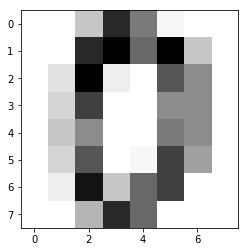

In [100]:
import matplotlib.pyplot as plt
import numpy as np

digits = datasets.load_digits()
samples, targets = digits.data, digits.target

%matplotlib inline
plt.imshow(np.reshape(samples[0], (8,8)), cmap='Greys')


from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

coms = 10
print "Project to " + str(coms) +"-dimensional space:"
print ""
pca = PCA(n_components=coms)
pca.fit(samples)
print "Variance ratio:"
print(pca.explained_variance_ratio_) 

print ""
print "Shape before and after PCA"
print samples.shape
samples_transed = pca.transform(samples)
print samples_transed.shape

X_train, X_test, y_train, y_test = train_test_split(samples_transed, targets, test_size=0.33, random_state=40)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)


print ""
print "Accuracy in test set: "
print metrics.accuracy_score(y_test, y_pred)

